# Diabetes prediction using Logistic Regression

In [314]:
# Importing necessary files.

import pandas as pd
import numpy as np
import seaborn as sns

In [315]:
# Dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [316]:
df.shape

(768, 9)

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [318]:
df.isnull().sum() ##! No null values are there

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [319]:
df[df.duplicated()] ##! No duplicates are there

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [320]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [321]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [322]:
columns_to_replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_to_replace_zero:
    df[col] = df[col].replace(0, df[col].median())  

In [323]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age'),
  Text(8, 0, 'Outcome')])

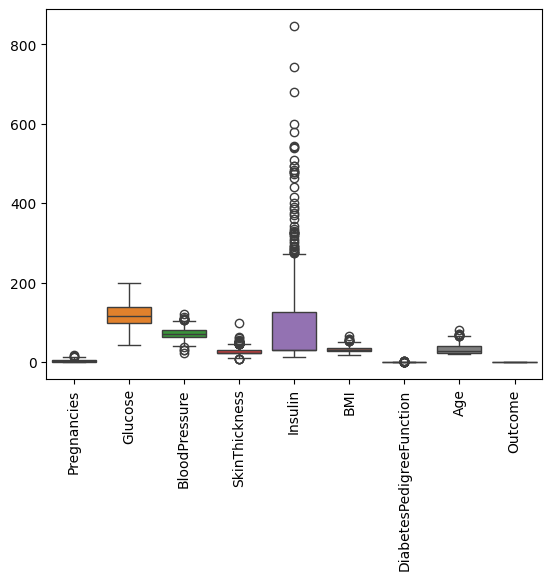

In [324]:
import matplotlib.pyplot as plt

sns.boxplot(data=df)
plt.xticks(rotation=90)

<Axes: >

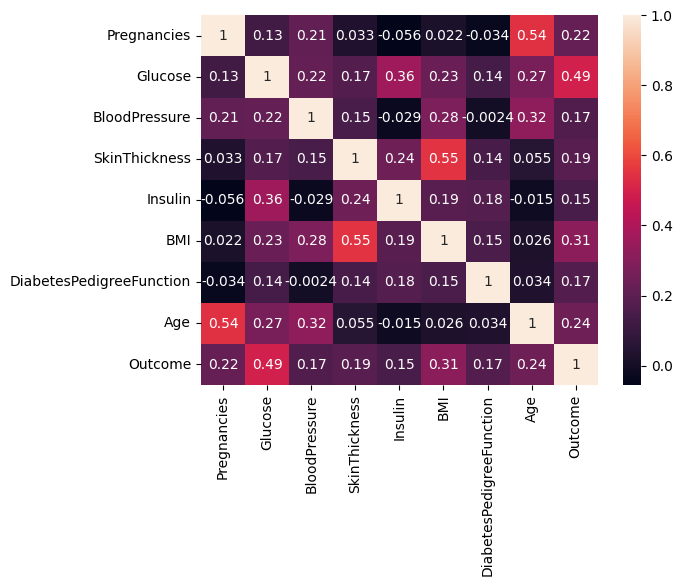

In [325]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

### Data is already clean

In [326]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [327]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [328]:
df['Outcome'].value_counts() ## Imbalanced data

Outcome
0    500
1    268
Name: count, dtype: int64

In [329]:
## Independent and Dependent feature.
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

y = df['Outcome']

In [330]:
# Doing Train/Test split of the data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [331]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [332]:
## Performing standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [333]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [334]:
X_train

array([[-0.85135507, -1.05642747, -0.82674004, ..., -0.76881064,
         0.31079384, -0.79216928],
       [ 0.35657564,  0.14439907,  0.47777235, ..., -0.41684116,
        -0.11643851,  0.56103382],
       [-0.5493724 , -0.55608308, -1.15286813, ...,  0.36042477,
        -0.76486207, -0.70759409],
       ...,
       [-0.85135507, -0.82293342, -0.17448384, ...,  0.82971741,
        -0.78607218, -0.28471812],
       [ 1.86648903, -0.35594533, -0.17448384, ..., -0.72481445,
        -1.01938346,  0.56103382],
       [ 0.05459296,  0.74481233, -1.15286813, ..., -0.43150656,
        -0.57700104,  0.30730824]], shape=(614, 8))

In [335]:
X_test

array([[ 0.96054099,  1.24515673, -0.66367599, ..., -0.73947985,
        -0.55579092,  0.56103382],
       [ 1.86648903, -1.79026591,  2.76066903, ...,  0.44841714,
        -0.58306107,  1.15306018],
       [-0.5493724 ,  0.01097389,  0.3147083 , ...,  0.50707872,
         0.01688223, -0.6230189 ],
       ...,
       [-0.5493724 , -1.32327781, -1.64206028, ..., -0.5781605 ,
         3.70138246, -0.70759409],
       [ 0.05459296,  2.07906404,  0.47777235, ...,  0.66839806,
        -0.64669142, -0.20014293],
       [-0.85135507, -1.69019703,  0.47777235, ...,  0.11111306,
        -0.16794879, -1.04589487]], shape=(154, 8))

## Model Training

In [336]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [337]:
## Training of the Model

model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [338]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [339]:
model.predict_proba(X_test)

array([[0.24978366, 0.75021634],
       [0.80193473, 0.19806527],
       [0.58163865, 0.41836135],
       [0.6023953 , 0.3976047 ],
       [0.94670683, 0.05329317],
       [0.72063831, 0.27936169],
       [0.33500954, 0.66499046],
       [0.03297876, 0.96702124],
       [0.86114002, 0.13885998],
       [0.09888511, 0.90111489],
       [0.58403598, 0.41596402],
       [0.34964392, 0.65035608],
       [0.80904886, 0.19095114],
       [0.85888786, 0.14111214],
       [0.58058872, 0.41941128],
       [0.48897609, 0.51102391],
       [0.15997957, 0.84002043],
       [0.87262068, 0.12737932],
       [0.10953496, 0.89046504],
       [0.81386676, 0.18613324],
       [0.75131458, 0.24868542],
       [0.22042422, 0.77957578],
       [0.7241024 , 0.2758976 ],
       [0.02811295, 0.97188705],
       [0.28062805, 0.71937195],
       [0.97884578, 0.02115422],
       [0.25807889, 0.74192111],
       [0.92967759, 0.07032241],
       [0.53888022, 0.46111978],
       [0.94394086, 0.05605914],
       [0.

In [340]:
## Checking accuracy of the model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy : ', accuracy_score(y_pred, y_test))
print('Confusion Matrix : \n', confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

Accuracy :  0.7272727272727273
Confusion Matrix : 
 [[74 16]
 [26 38]]
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        90
           1       0.70      0.59      0.64        64

    accuracy                           0.73       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.72      0.73      0.72       154



## Hyperparameter Tuning.

In [341]:
model = LogisticRegression(class_weight='balanced')

In [342]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv=StratifiedKFold()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100, 10, 1.0, 0.1, 0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

params = dict(penalty = penalty, C=c_values, solver=solver)

grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=cv, n_jobs=-1)

grid

,estimator,LogisticRegre...ht='balanced')
,param_grid,"{'C': [100, 10, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [343]:
grid.fit(X_train, y_train)

d:\Study\Coading New Start\ML journey\Projects\Project 3\venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Study\Coading New Start\ML journey\Projects\Project 3\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Study\Coading New Start\ML journey\Projects\Project 3\venv\lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\Study\Coading New Start\ML journey\Projects\P

,estimator,LogisticRegre...ht='balanced')
,param_grid,"{'C': [100, 10, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [344]:
grid.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [345]:
grid.best_score_

np.float64(0.7606024256963881)

In [346]:
y_pred = grid.predict(X_test)

In [347]:
from sklearn.metrics import accuracy_score, confusion_matrix

score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)

0.7272727272727273
[[75 25]
 [17 37]]


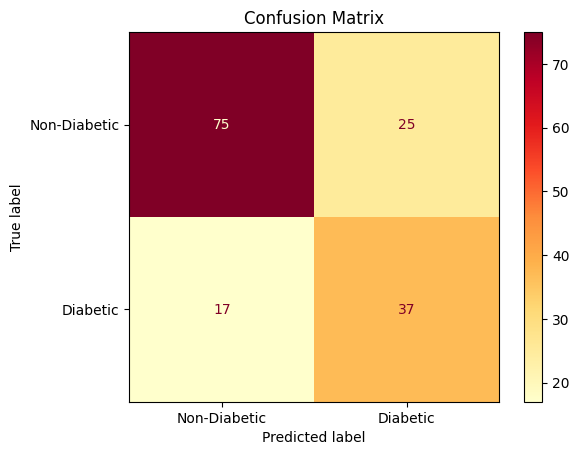

In [348]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test, display_labels=["Non-Diabetic", "Diabetic"], cmap="YlOrRd")
plt.title("Confusion Matrix")
plt.show()

In [349]:
from sklearn.metrics import roc_auc_score

y_proba = grid.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", auc_score)

ROC AUC Score: 0.8094444444444445


### Pickling the model

In [350]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(grid, open('model.pkl', 'wb'))